In [1]:
from graph_tool.all import *
import graph_tool as gt

In [2]:
import pickle

with open('../../data/aus_to_aus/nested_block_state_1000.gt.pickle', mode='rb') as file:
    state = pickle.load(file)

In [3]:
import pandas as pd

def get_path_to_root(hierarchy_levels, group):
    result = [group]
    
    last_lookup = group
    
    for level in hierarchy_levels[1:]:
        last_lookup = level[last_lookup]
        result.append(last_lookup)
    
    return result


def get_hierarchy_table(hierarchy_levels):
    
    table = []
    
    for group in range(len(hierarchy_levels[1])):
        table.append(get_path_to_root(hierarchy_levels, group))

    return pd.DataFrame(table).set_index(0, drop=True)

In [4]:
hierarchy_levels = state.get_bs()

hierarchy_table = get_hierarchy_table(hierarchy_levels)

In [5]:
tree_data = hierarchy_table.reset_index()
tree_data = tree_data[tree_data.columns[::-1]]
tree_data.columns=["6","5","4","3","2","1","0"]

tree_data.head()

6  5  4  3  2  1  0
0  0  0  0  0  0  0  0
1  0  0  0  0  0  1  1
2  0  0  1  1  1  2  2
3  0  0  0  2  2  3  3
4  0  0  0  0  3  4  4

In [49]:
def load_from_pickle(filename):
    with open(filename, mode='rb') as file:
        return pickle.load(file)

keyword_tables = load_from_pickle('../../data/austwittersphere1000/1000plus_keyword_tables.pickle')

In [7]:
tree_data_n_words = pd.merge(tree_data, keyword_tables[0], left_on='0', right_index=True)
tree_data_n_words.head()

6  5  4  3  2  1  0    n                                           keywords
0  0  0  0  0  0  0  0  365                                                   
1  0  0  0  0  0  1  1  303                                                   
2  0  0  1  1  1  2  2   37                                                   
3  0  0  0  2  2  3  3  276                                                afl
4  0  0  0  0  3  4  4  297  gdc, indiedev, gamedev, screenshotsaturday, pi...

In [8]:
def save_to_pickle(obj, filename):
    with open(filename, mode='wb') as file:
        pickle.dump(obj, file)

save_to_pickle(tree_data_n_words, '../../data/austwittersphere1000/1000plus_SBM_tree_data_with_words.pickle')

In [1]:
import pickle

def load_from_pickle(filename):
    with open(filename, mode='rb') as file:
        return pickle.load(file)
    
tree_data_n_words = load_from_pickle('../../data/austwittersphere1000/1000plus_SBM_tree_data_with_words.pickle')

In [2]:
tree_data_n = tree_data_n_words.drop("keywords", axis=1)
tree_data_n.head()

6  5  4  3  2  1  0    n
0  0  0  0  0  0  0  0  365
1  0  0  0  0  0  1  1  303
2  0  0  1  1  1  2  2   37
3  0  0  0  2  2  3  3  276
4  0  0  0  0  3  4  4  297

In [9]:
tree_data_n['n'] = tree_data_n['n'].astype("int")

In [11]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [29]:
tree_data_n_words['n'] = tree_data_n_words['n'].astype(int)

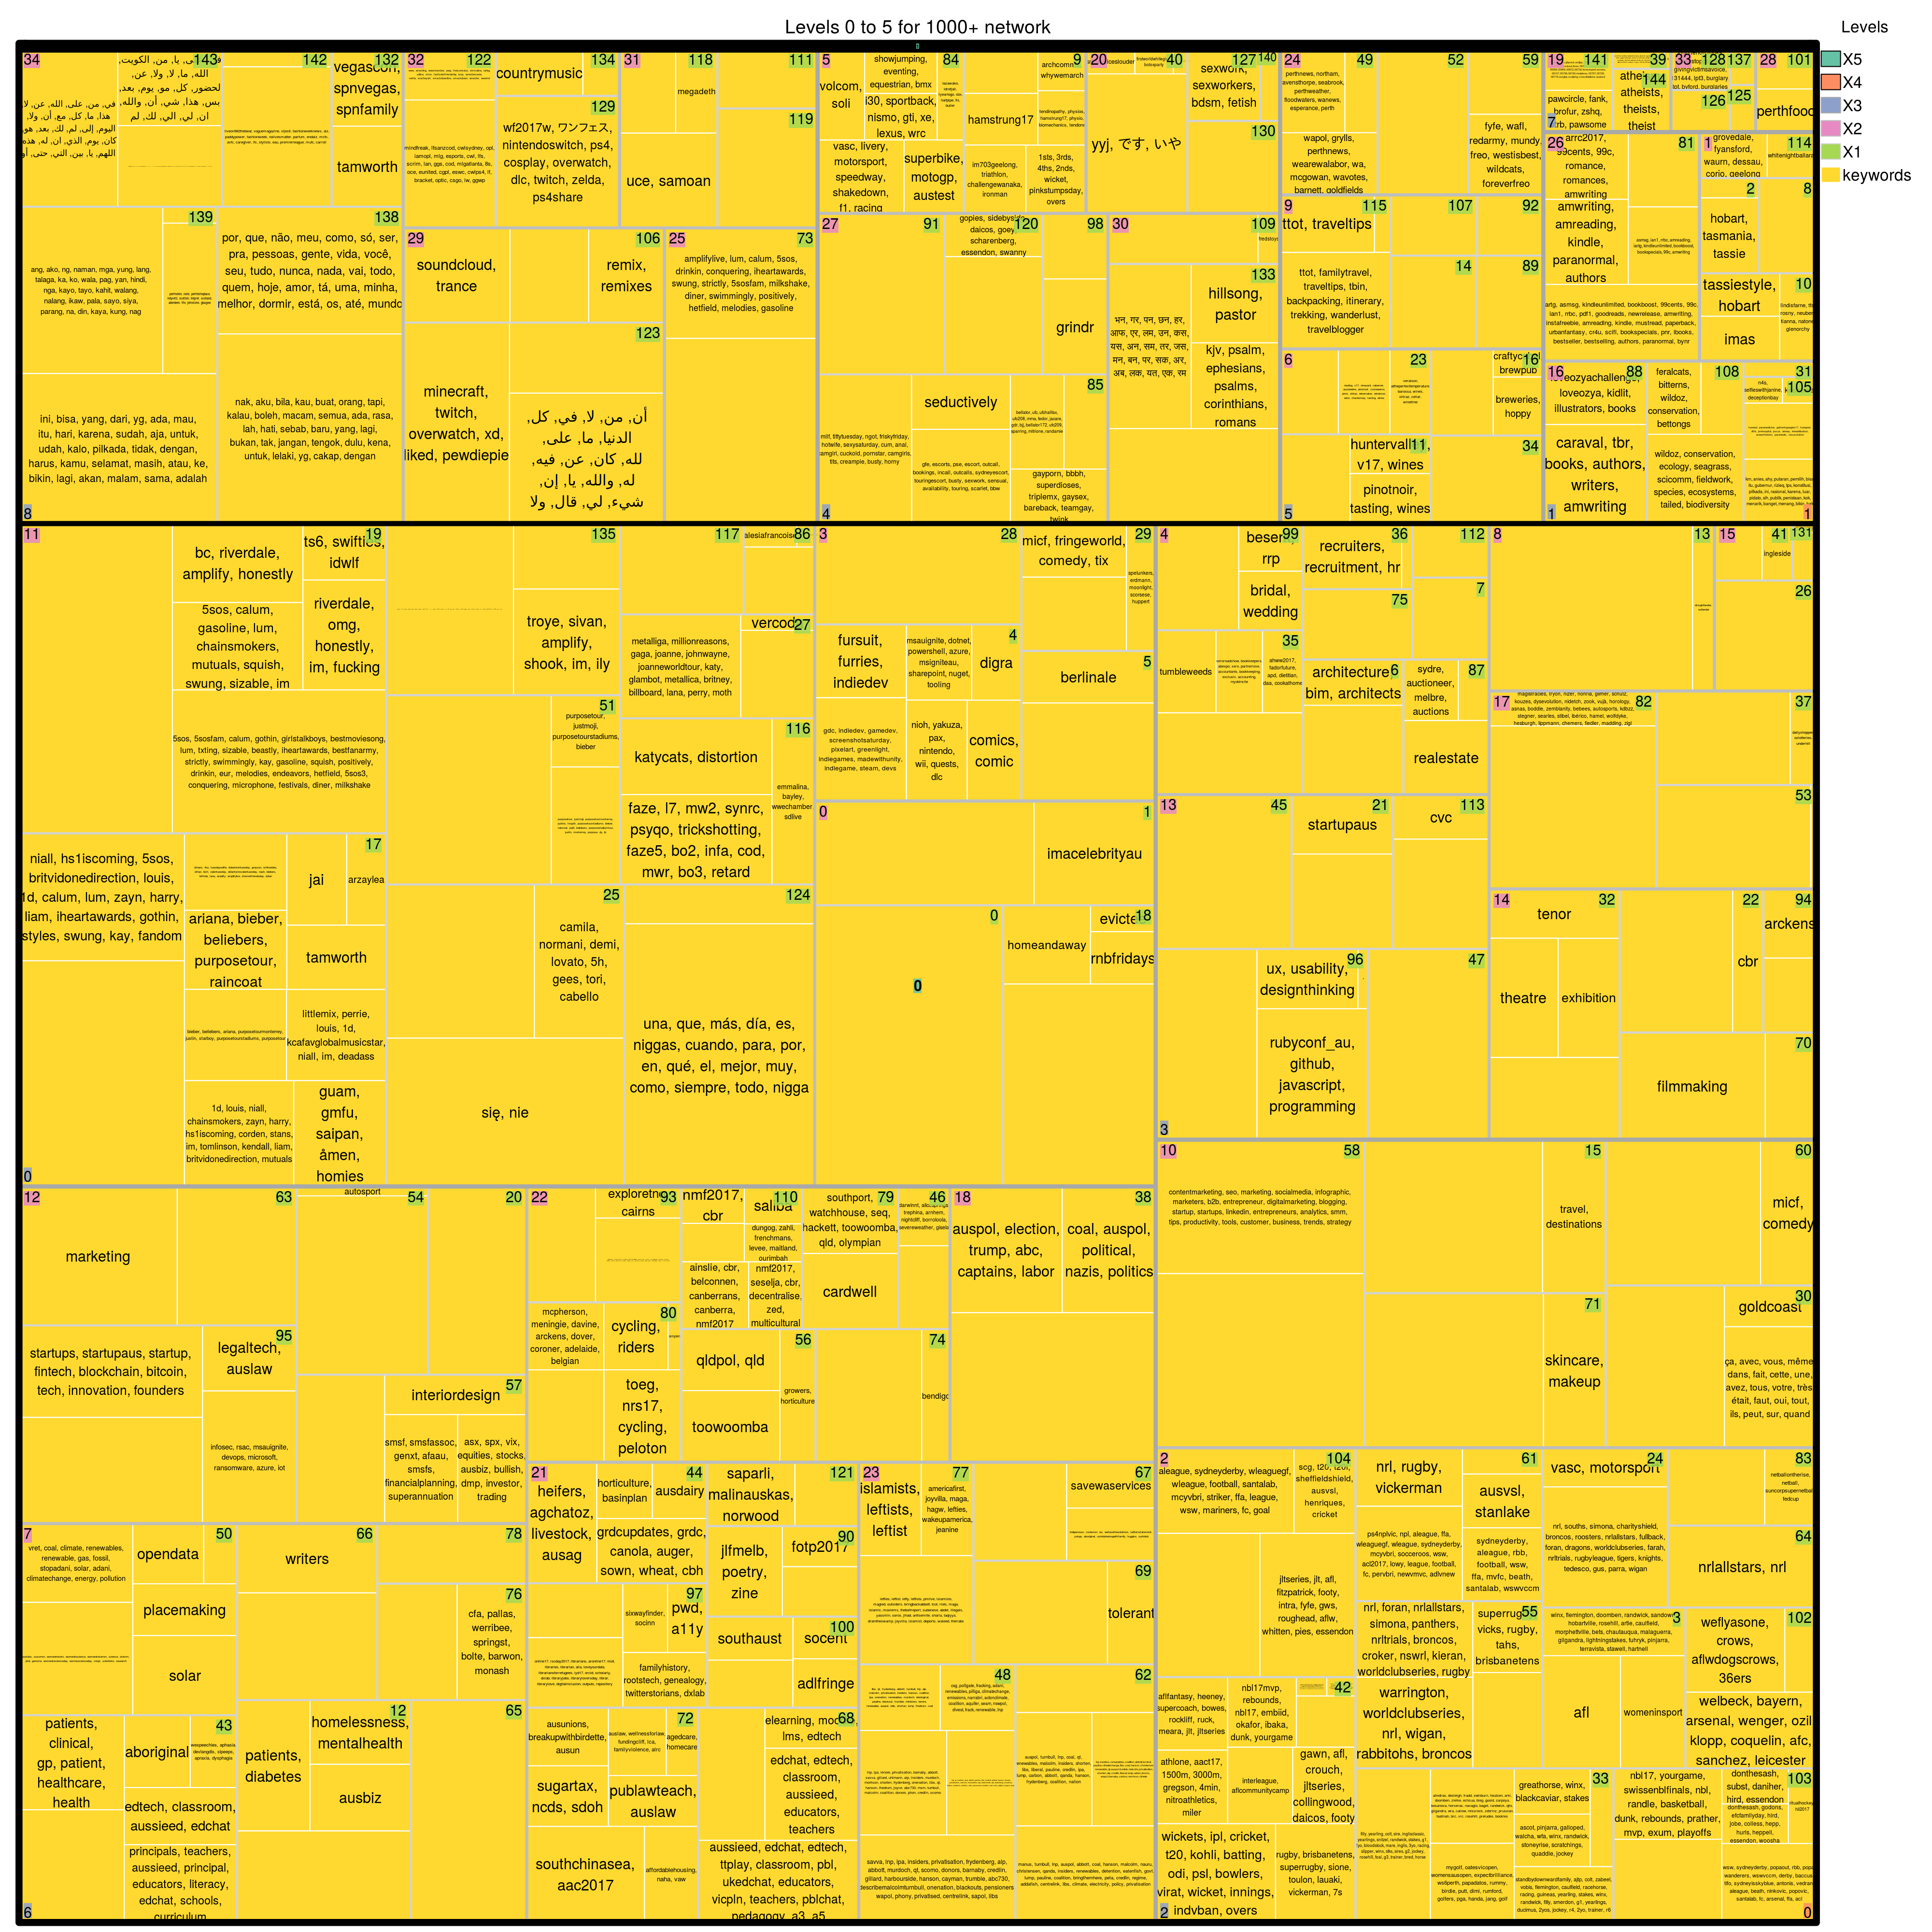

In [164]:
%%R -i tree_data_n_words -w 4000 -h 4000 --units px -r 200

library(treemap)

p=treemap(tree_data_n_words,
            index=c("X5","X4","X3","X2","X1","keywords"),
            vSize="n",
            type="depth",
            title="Levels 0 to 5 for 1000+ network",
            title.legend="Levels",
            border.col=c("black","black","dark grey","grey","light grey","white"),
            force.print.labels=TRUE,
            overlap.labels=1,
            lowerbound.cex.labels=0,
            algorithm="squarified",
            align.labels=list(
                c("center", "center"), 
                c("right", "bottom"),
                c("left", "bottom"),
                c("left", "top"),
                c("right", "top"),
                c("center", "center")
                ), 
            )

In [137]:
import pandas as pd

def get_tree_until_level(tree_data_n, keyword_tables, level):
    
    result = tree_data_n
    
    for i in range(level + 1):
        result = result.drop(str(i), axis=1)
    
    result = result.groupby(str(level + 1)).max()
    
    result = pd.merge(result.drop("n", axis=1), keyword_tables[level + 1], left_index=True, right_index=True)
    
    result['n'] = result['n'].astype(int)
    
    result['keywords'] =  result['keywords'] + " (" + result.index.astype(str) + ")"

    return result

tree_1 = get_tree_until_level(tree_data_n, keyword_tables, 0)

display(tree_data_n, tree_1)

6  5  4  3   2    1    0    n
0    0  0  0  0   0    0    0  365
1    0  0  0  0   0    1    1  303
2    0  0  1  1   1    2    2   37
3    0  0  0  2   2    3    3  276
4    0  0  0  0   3    4    4  297
5    0  0  0  0   3    5    5  219
6    0  0  0  3   4    6    6  144
7    0  0  0  3   4    7    7   40
8    0  0  1  1   1    8    8  144
9    0  0  1  4   5    9    9  133
10   0  0  1  1   1   10   10  108
11   0  0  1  5   6   11   11   86
12   0  0  0  6   7   12   12  299
13   0  0  0  3   8   13   13  144
14   0  0  1  5   9   14   14  249
15   0  0  0  2  10   15   15  106
16   0  0  1  5   6   16   16   44
17   0  0  0  2  10   15   17  151
18   0  0  0  0  11   17   18  190
19   0  0  0  0   0   18   19   95
20   0  0  0  0  11   19   20  323
21   0  0  0  0  11   17   21  204
22   0  0  0  6  12   20   22  203
23   0  0  0  3  13   21   23  153
24   0  0  0  3  14   22   24  121
25   0  0  1  5   6   23   25  110
26   0  0  0  2   2   24   26  476
27   0  0  0  0   0    1   27  398
28   0  0  0  0  11   25   28  224
29   0  0  0  3  15   26   29   43
..  .. .. .. ..  ..  ...  ...  ...
588  0  0  1  4  30  109  588   35
589  0  0  0  2   2   42  589   17
590  0  0  1  4  30  133  590  220
591  0  0  0  0  11  135  591  685
592  0  0  0  0  11   17  592  172
593  0  0  0  3  15  131  593    7
594  0  0  0  6  22   80  594   28
595  0  0  1  4  27  120  595  224
596  0  0  1  8  34  138  596  741
597  0  0  0  3   4    7  597   61
598  0  0  1  4  30  133  598  164
599  0  0  0  3  13   96  599   27
600  0  0  1  8  34  142  600   61
601  0  0  0  2   2  103  601   83
602  0  0  1  1  26   81  602  167
603  0  0  1  4  30  133  603  429
604  0  0  1  4   5   84  604  138
605  0  0  1  4   5    9  605   51
606  0  0  1  8  32  134  606   54
607  0  0  0  0  11   17  607  200
608  0  0  1  8  34  143  608  251
609  0  0  1  1  16  108  609   98
610  0  0  1  7  19  144  610  115
611  0  0  1  8  34  139  611  752
612  0  0  1  8  34  139  612   28
613  0  0  1  1  16  105  613  147
614  0  0  1  8  34  132  614  173
615  0  0  0  6  22  110  615   68
616  0  0  1  4  20   40  616  443
617  0  0  1  8  34  143  617  266

[618 rows x 8 columns]

6  5  4  3   2     n                                           keywords
0    0  0  0  0   0  1660                                                (0)
1    0  0  0  0   0  1115                                 imacelebrityau (1)
2    0  0  1  1   1   178                       hobart, tasmania, tassie (2)
3    0  0  0  2   2   721         winx, afl, randwick, aflw, bets, sport (3)
4    0  0  0  0   3  1145  gdc, indiedev, gamedev, devs, steam, games, co...
5    0  0  0  0   3   632                                                (5)
6    0  0  0  3   4   425                       architecture, architects (6)
7    0  0  0  3   4   197                                                (7)
8    0  0  1  1   1   171                                                (8)
9    0  0  1  4   5   630                            triathlon, athletes (9)
10   0  0  1  1   1   322  lindisfarne, hobart, tasmania, tasmanian, poli...
11   0  0  1  5   6   423  wines, pinot, tasting, wine, vineyard, chardon...
12   0  0  0  6   7  1213  health, ausbiz, patients, research, prof, rese...
13   0  0  0  3   8  1184                                               (13)
14   0  0  1  5   9   249                                               (14)
15   0  0  0  2  10  1162                       delicious, recipe, chef (15)
16   0  0  1  5   6   305                 craftbeer, ale, brewery, beer (16)
17   0  0  0  0  11  4066  im, niall, 1d, louis, ur, cute, lmao, bitch, w...
18   0  0  0  0   0  1347                                               (18)
19   0  0  0  0  11  3567  5sos, calum, lum, im, honestly, grammy, riverd...
20   0  0  0  6  12   581                                               (20)
21   0  0  0  3  13   491                                       startup (21)
22   0  0  0  3  14   647                      southaustralia, adelaide (22)
23   0  0  1  5   6   404  wines, riesling, barossa, v17, shiraz, caberne...
24   0  0  0  2   2   630  nrl, souths, simona, charityshield, broncos, r...
25   0  0  0  0  11  2254                              não, meu, quando (25)
26   0  0  0  3  15   353                                               (26)
27   0  0  0  0  11   634  metalliga, gaga, joanne, katy, glambot, metall...
28   0  0  0  0   3   654                                               (28)
29   0  0  0  0   3   536                        comedy, moonlight, tix (29)
..  .. .. .. ..  ..   ...                                                ...
115  0  0  1  5   9   536  ttot, familytravel, traveltips, itinerary, bac...
116  0  0  0  0  11  1014                                    faze, cod (116)
117  0  0  0  0  11   352                                              (117)
118  0  0  1  8  31   549                                              (118)
119  0  0  1  8  31   375                                              (119)
120  0  0  1  4  27   496                                       gopies (120)
121  0  0  0  6  21   304                                      saparli (121)
122  0  0  1  8  32   520  mindfreak, lfsanzcod, cwlsydney, opl, iamopl, ...
123  0  0  1  8  29  1647                                       من, في (123)
124  0  0  0  0  11  1804  niggas, una, que, más, día, es, cuando, para, ...
125  0  0  1  7  33    38                                              (125)
126  0  0  1  7  33    78                                              (126)
127  0  0  1  4  20   165            sexwork, sexworkers, bdsm, fetish (127)
128  0  0  1  7  33    76  tougherforcrooks, crimestopperswa, givingvicti...
129  0  0  1  8  32   512  wf2017w, ワンフェス, nintendoswitch, ps4, cosplay, ...
130  0  0  1  4  20   269                                              (130)
131  0  0  0  3  15    43                                              (131)
132  0  0  1  8  34   354                                     tamworth (132)
133  0  0  1  4  30  1401                                              (133)
134  0  0  1  8  32   182                                 countrymusic (134)
1

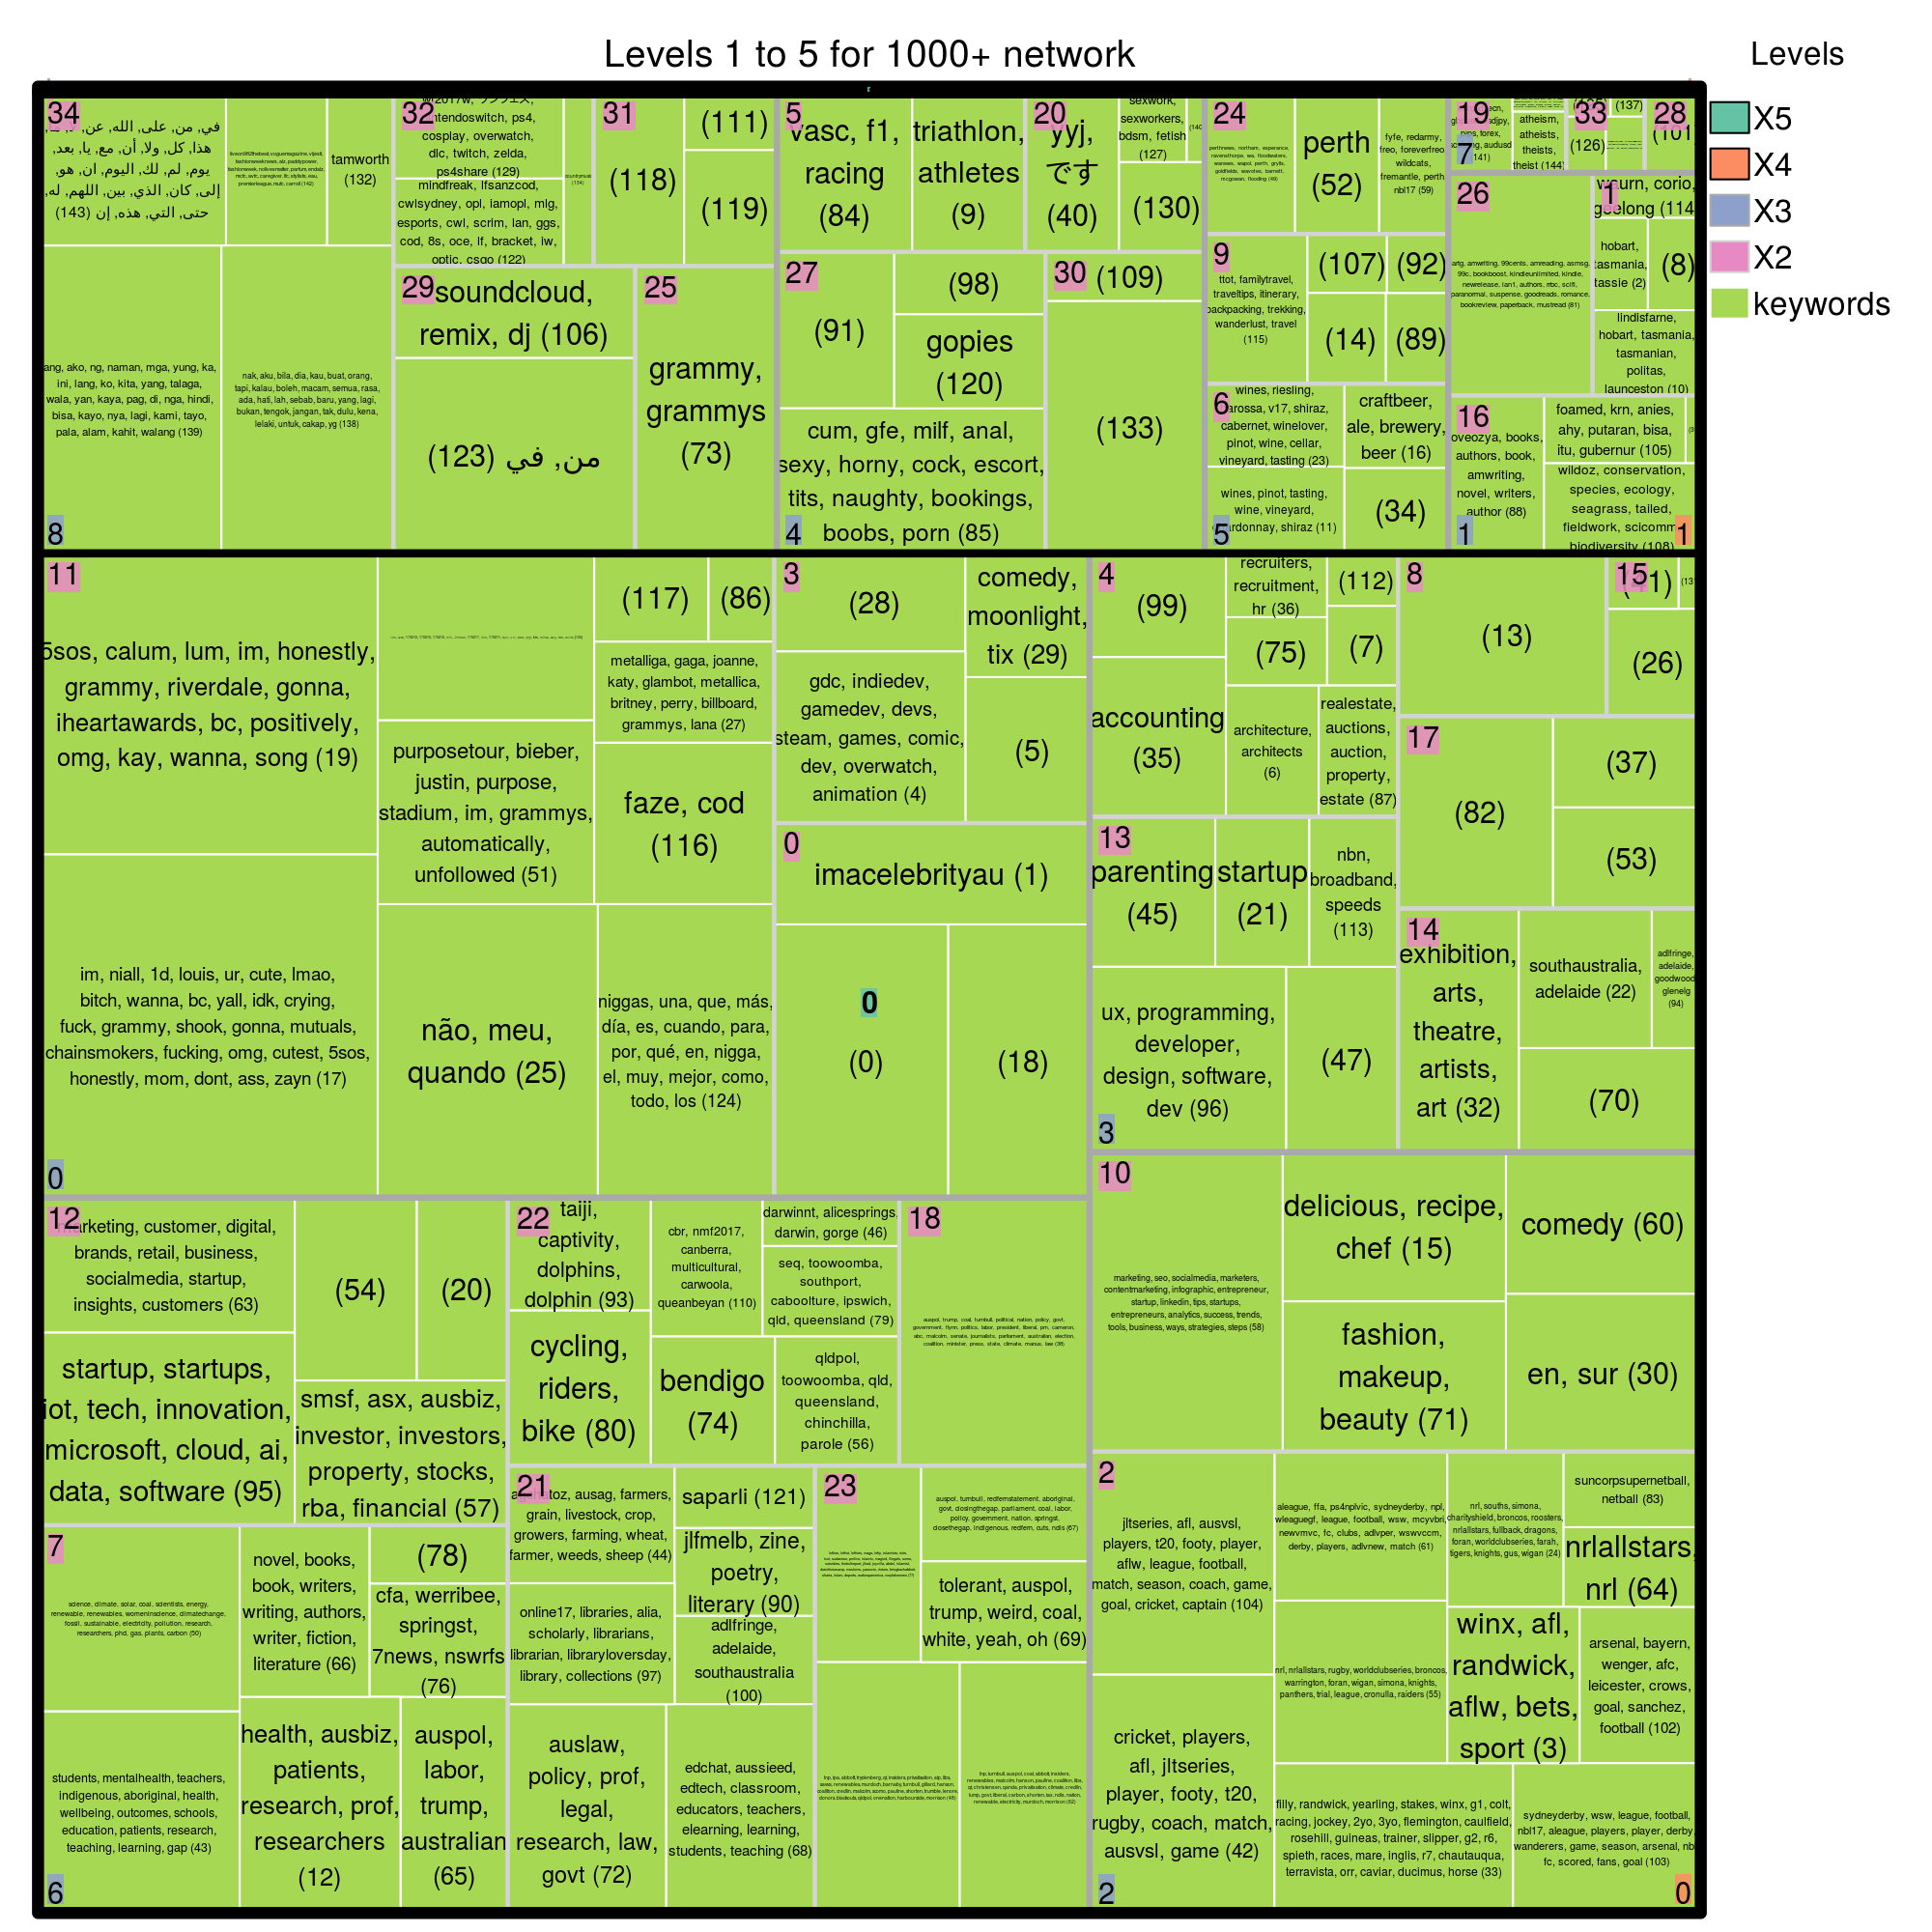

In [165]:
%%R -i tree_1 -w 2000 -h 2000 --units px -r 200

library(treemap)

p=treemap(tree_1,
            index=c("X5","X4","X3","X2","keywords"),
            vSize="n",
            type="depth",
            title="Levels 1 to 5 for 1000+ network",
            title.legend="Levels",
            border.col=c("black","black","dark grey","light grey","white"),
            force.print.labels=TRUE,
            overlap.labels=1,
            lowerbound.cex.labels=0,
            algorithm="squarified",
            align.labels=list(
                c("center", "center"), 
                c("right", "bottom"),
                c("left", "bottom"),
                c("left", "top"),
                c("center", "center")
                ),
            )

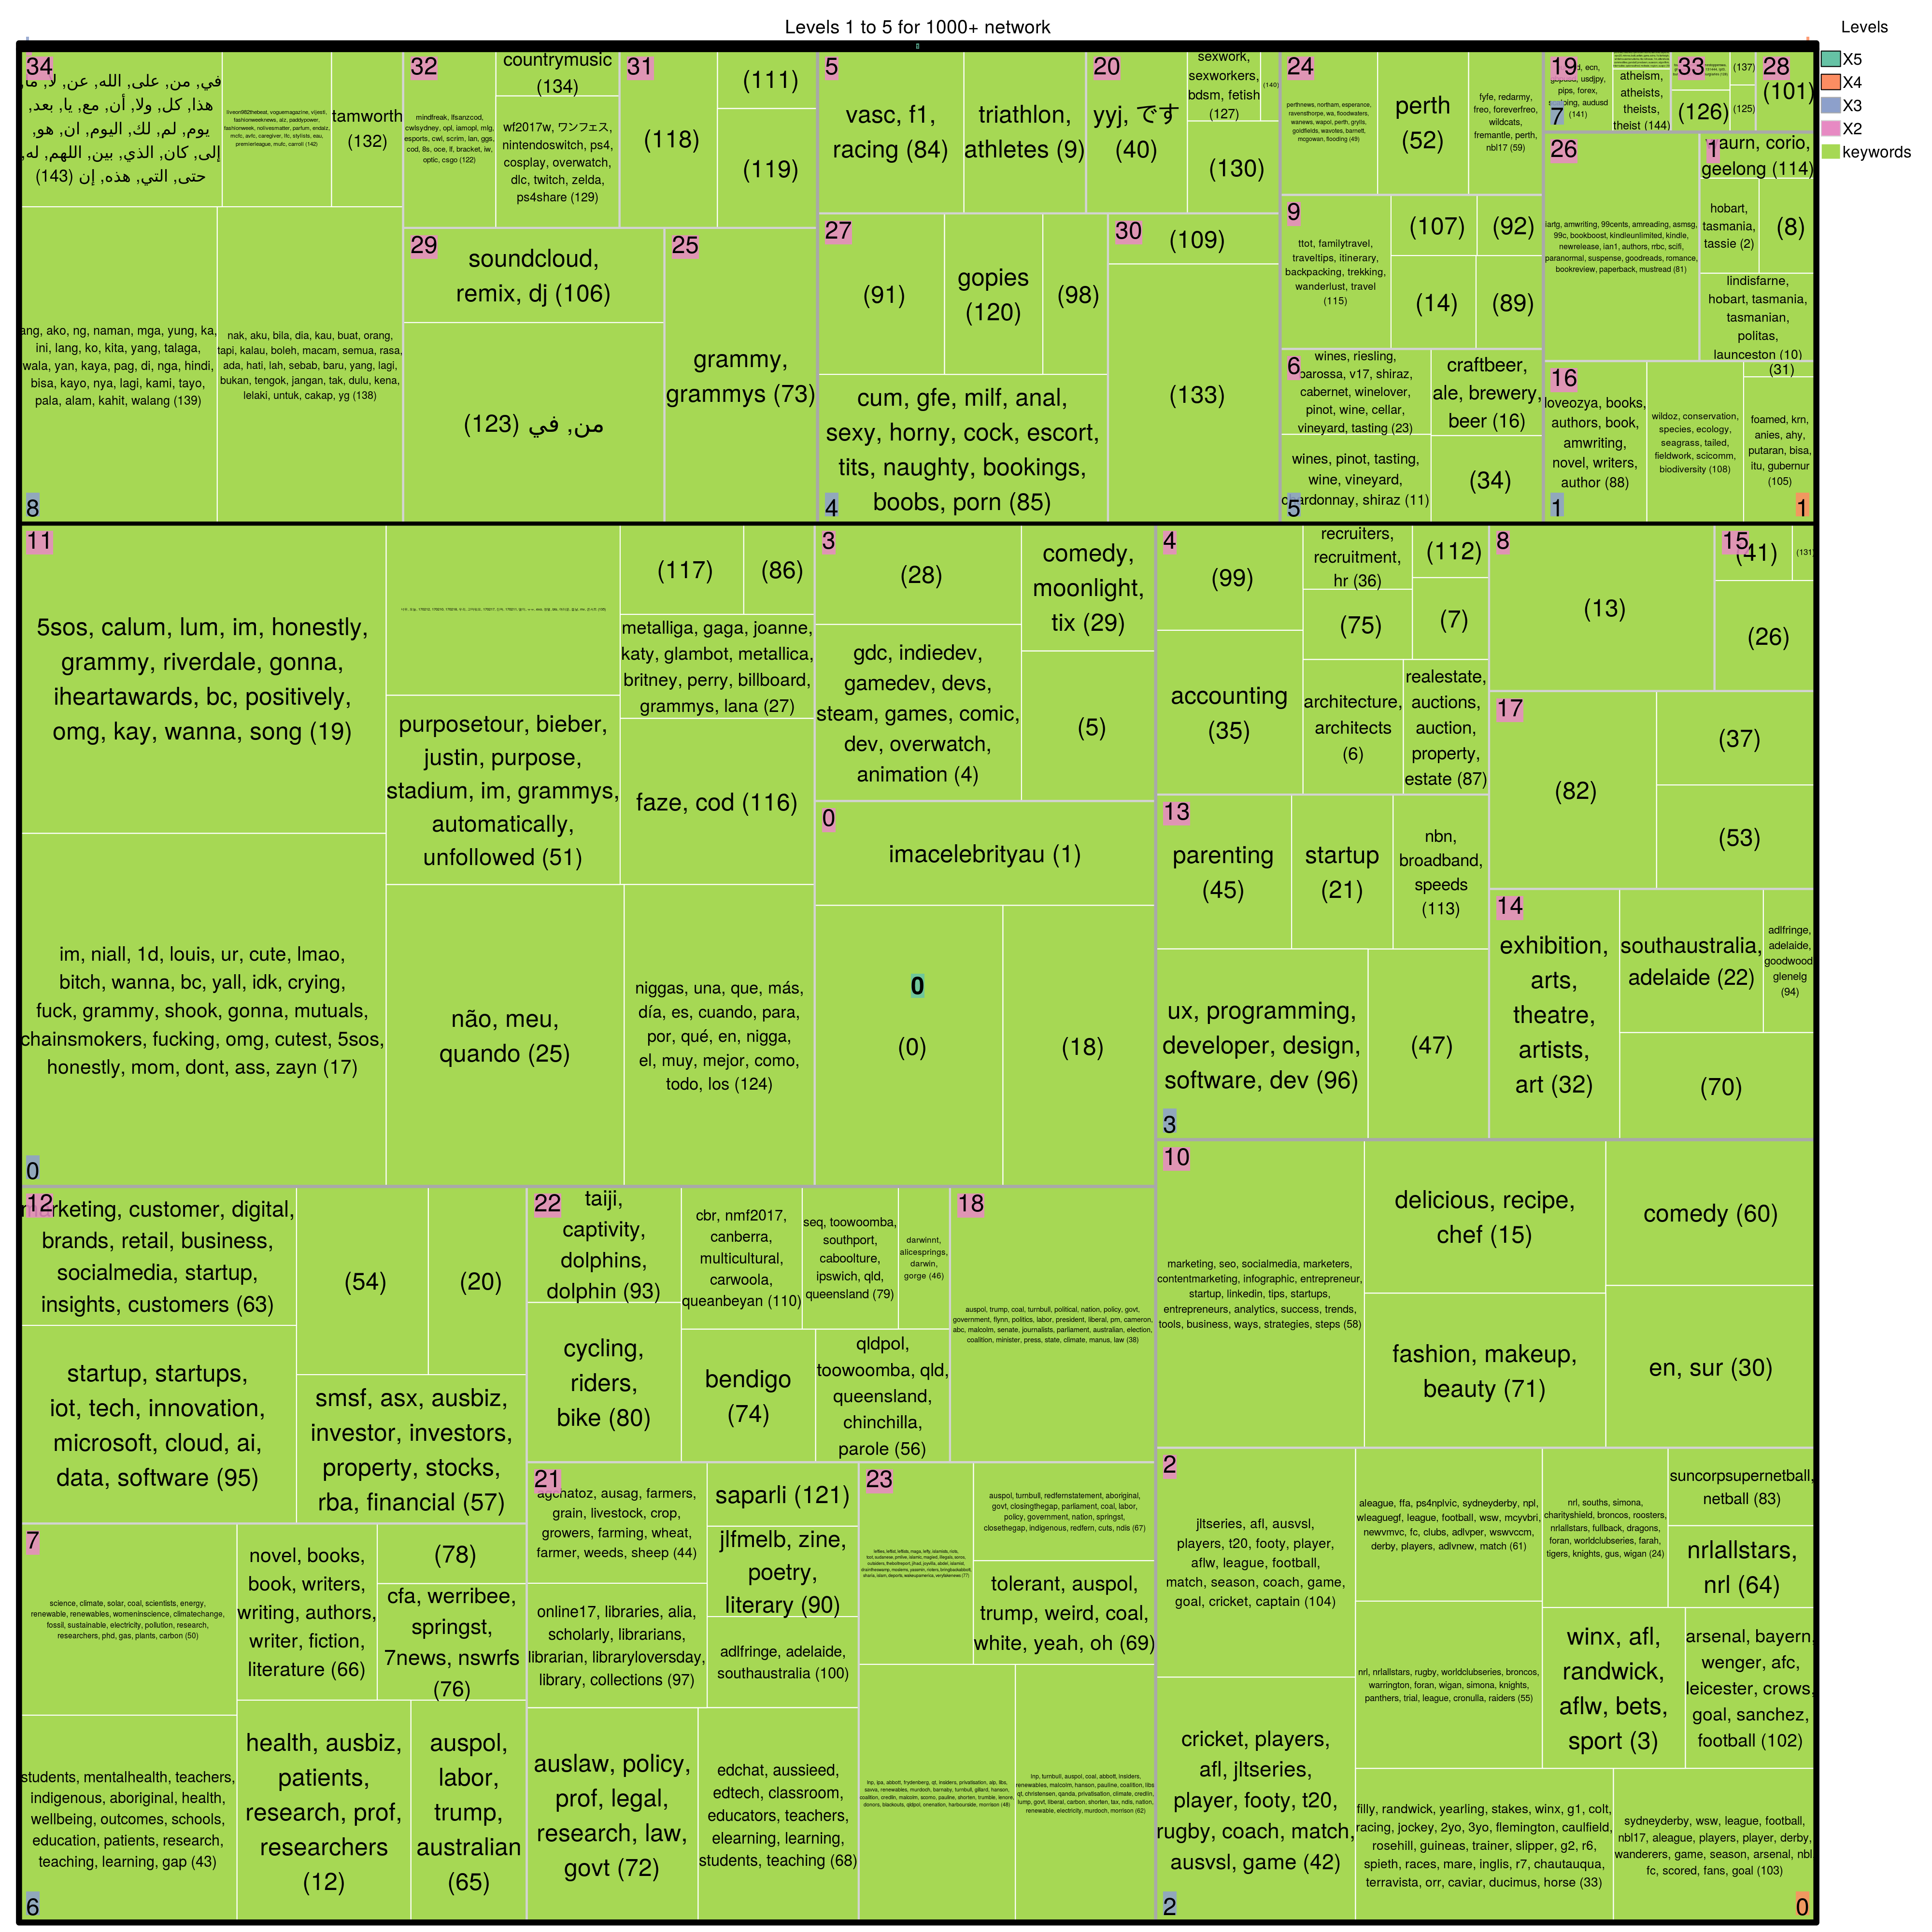

In [166]:
%%R -i tree_1 -w 4000 -h 4000 --units px -r 200

library(treemap)

p=treemap(tree_1,
            index=c("X5","X4","X3","X2","keywords"),
            vSize="n",
            type="depth",
            title="Levels 1 to 5 for 1000+ network",
            title.legend="Levels",
            border.col=c("black","black","dark grey","light grey","white"),
            force.print.labels=TRUE,
            overlap.labels=1,
            lowerbound.cex.labels=0,
            algorithm="squarified",
            align.labels=list(
                c("center", "center"), 
                c("right", "bottom"),
                c("left", "bottom"),
                c("left", "top"),
                c("center", "center")
                ),
           fontsize.labels=18
            )

In [143]:
tree_2 = get_tree_until_level(tree_data_n, keyword_tables, 1)

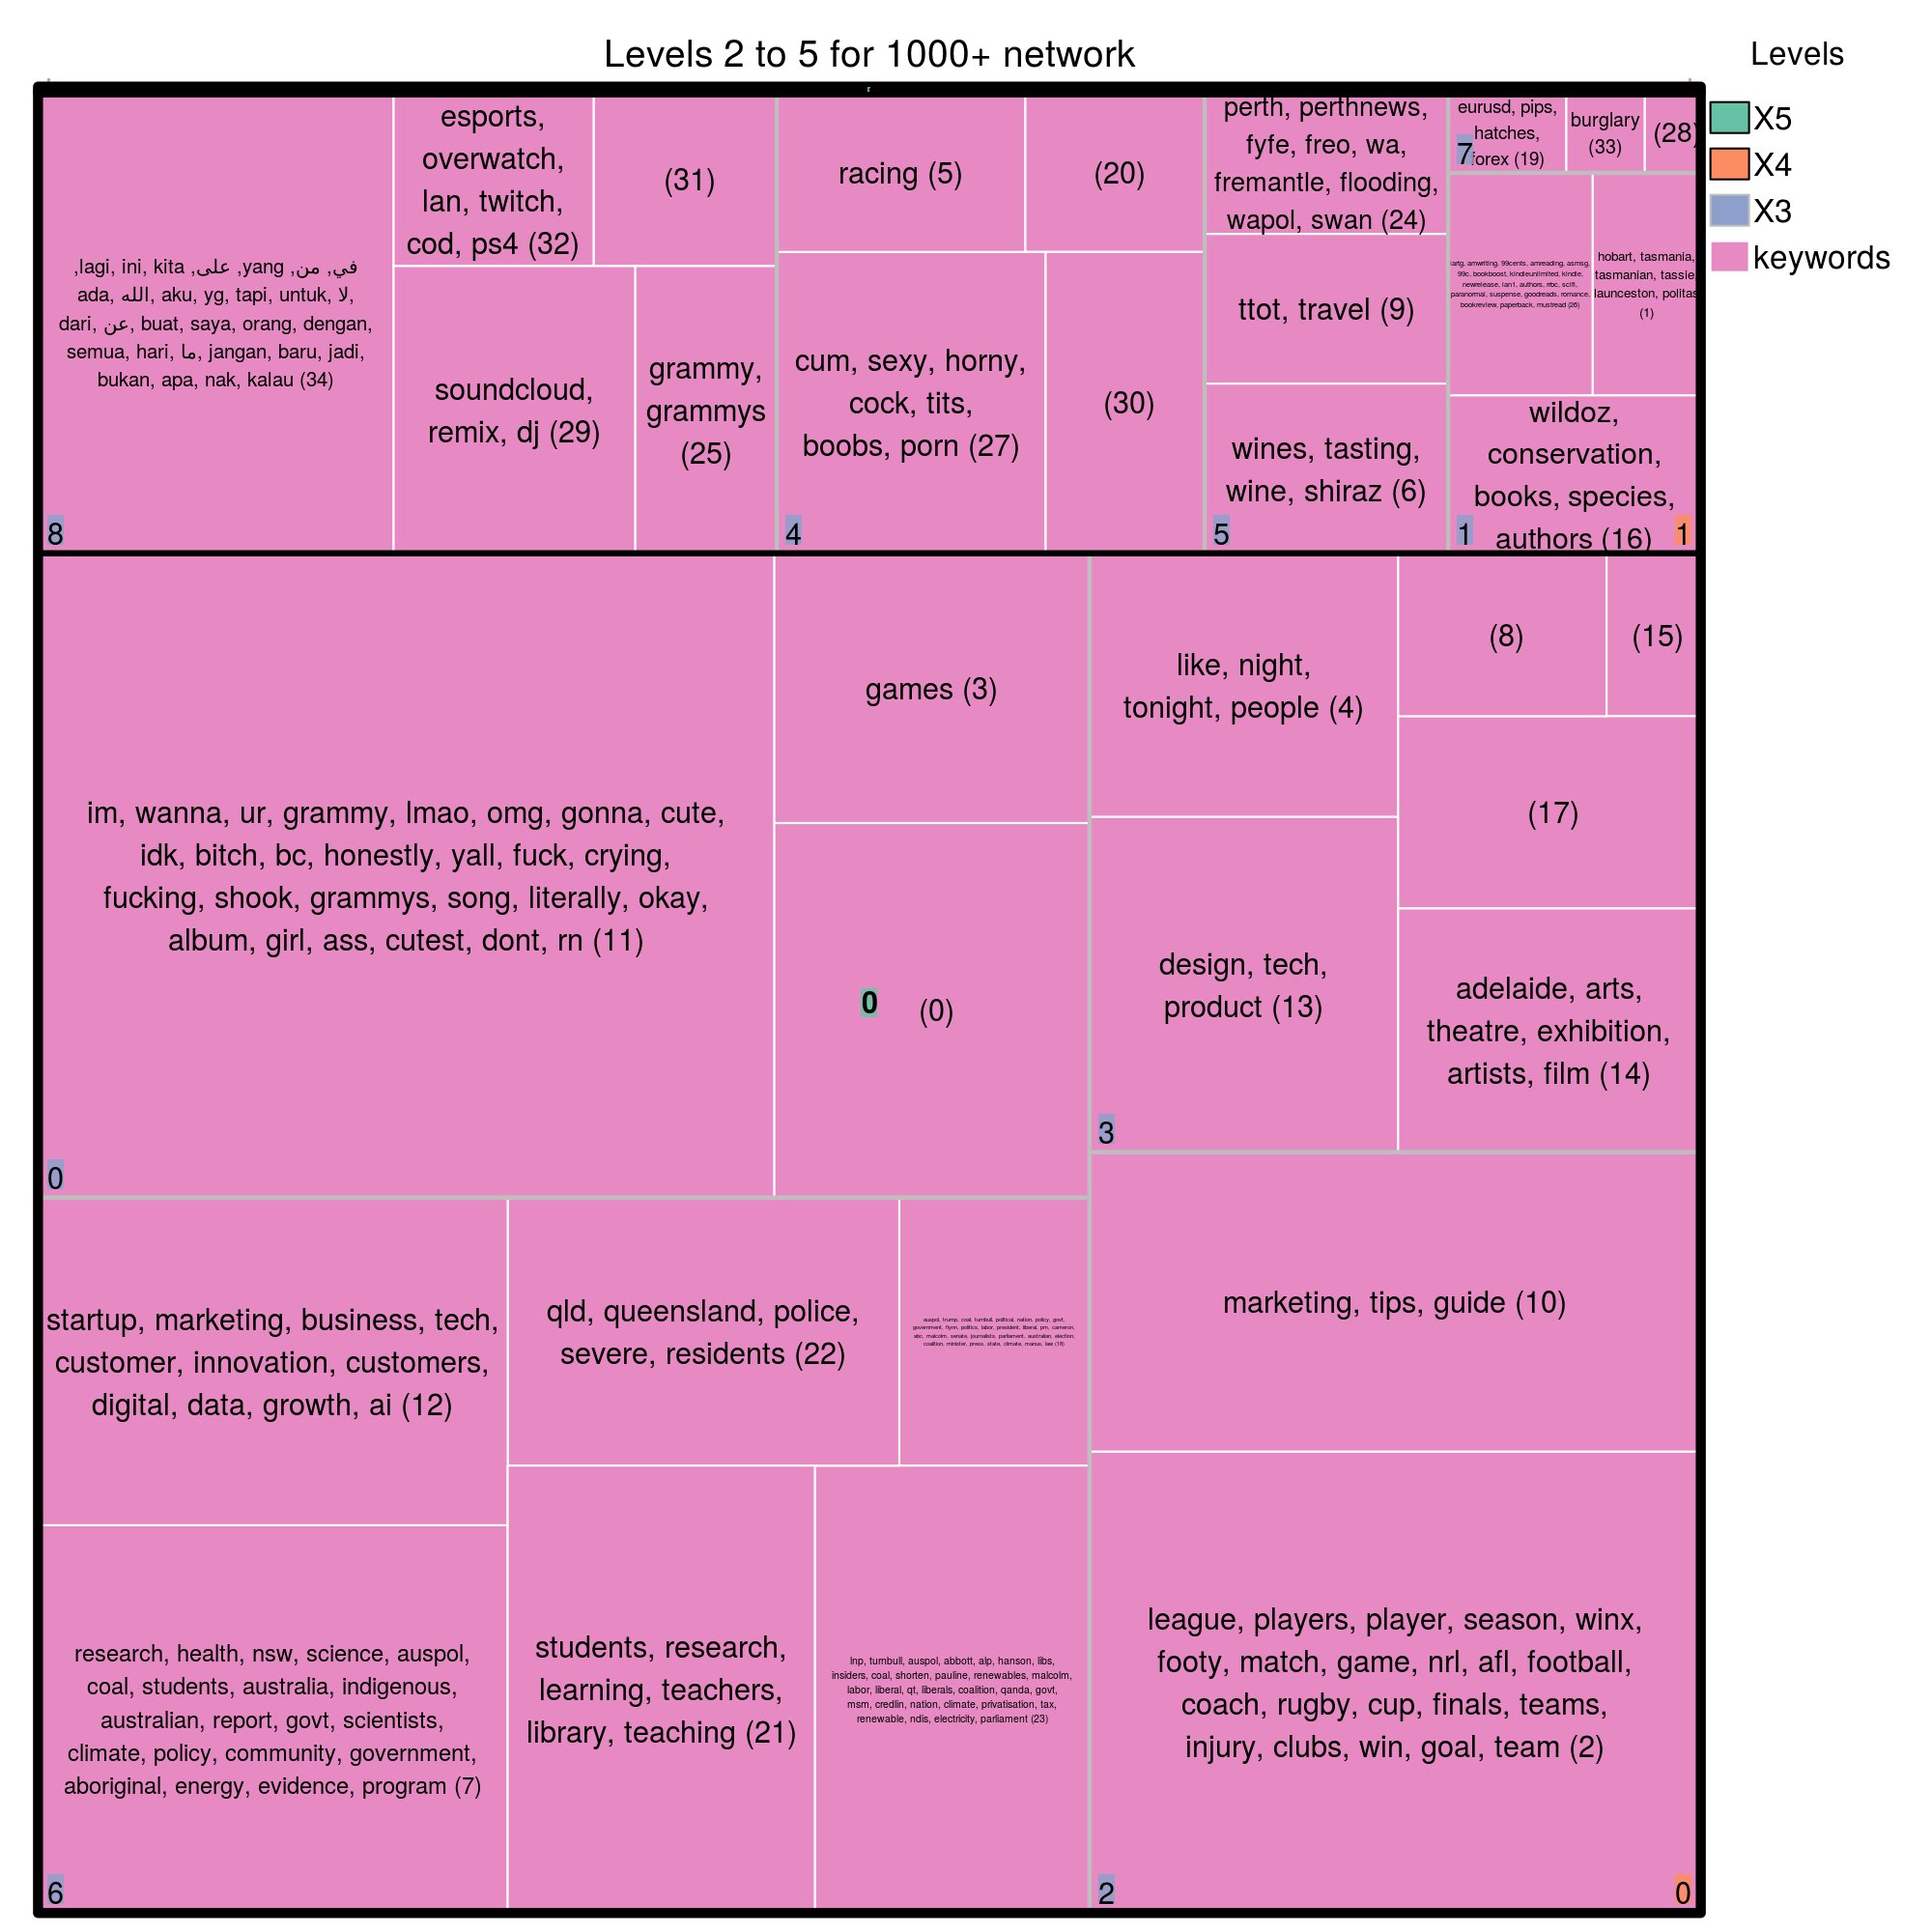

In [152]:
%%R -i tree_2 -w 2000 -h 2000 --units px -r 200

library(treemap)

p=treemap(tree_2,
            index=c("X5","X4","X3","keywords"),
            vSize="n",
            type="depth",
            title="Levels 2 to 5 for 1000+ network",
            title.legend="Levels",
            border.col=c("black","black","grey","white"),
            force.print.labels=TRUE,
            overlap.labels=1,
            lowerbound.cex.labels=0,
            algorithm="squarified",
             align.labels=list(
                c("center", "center"), 
                c("right", "bottom"),
                c("left", "bottom"),
                c("center", "center")
                ),
            )

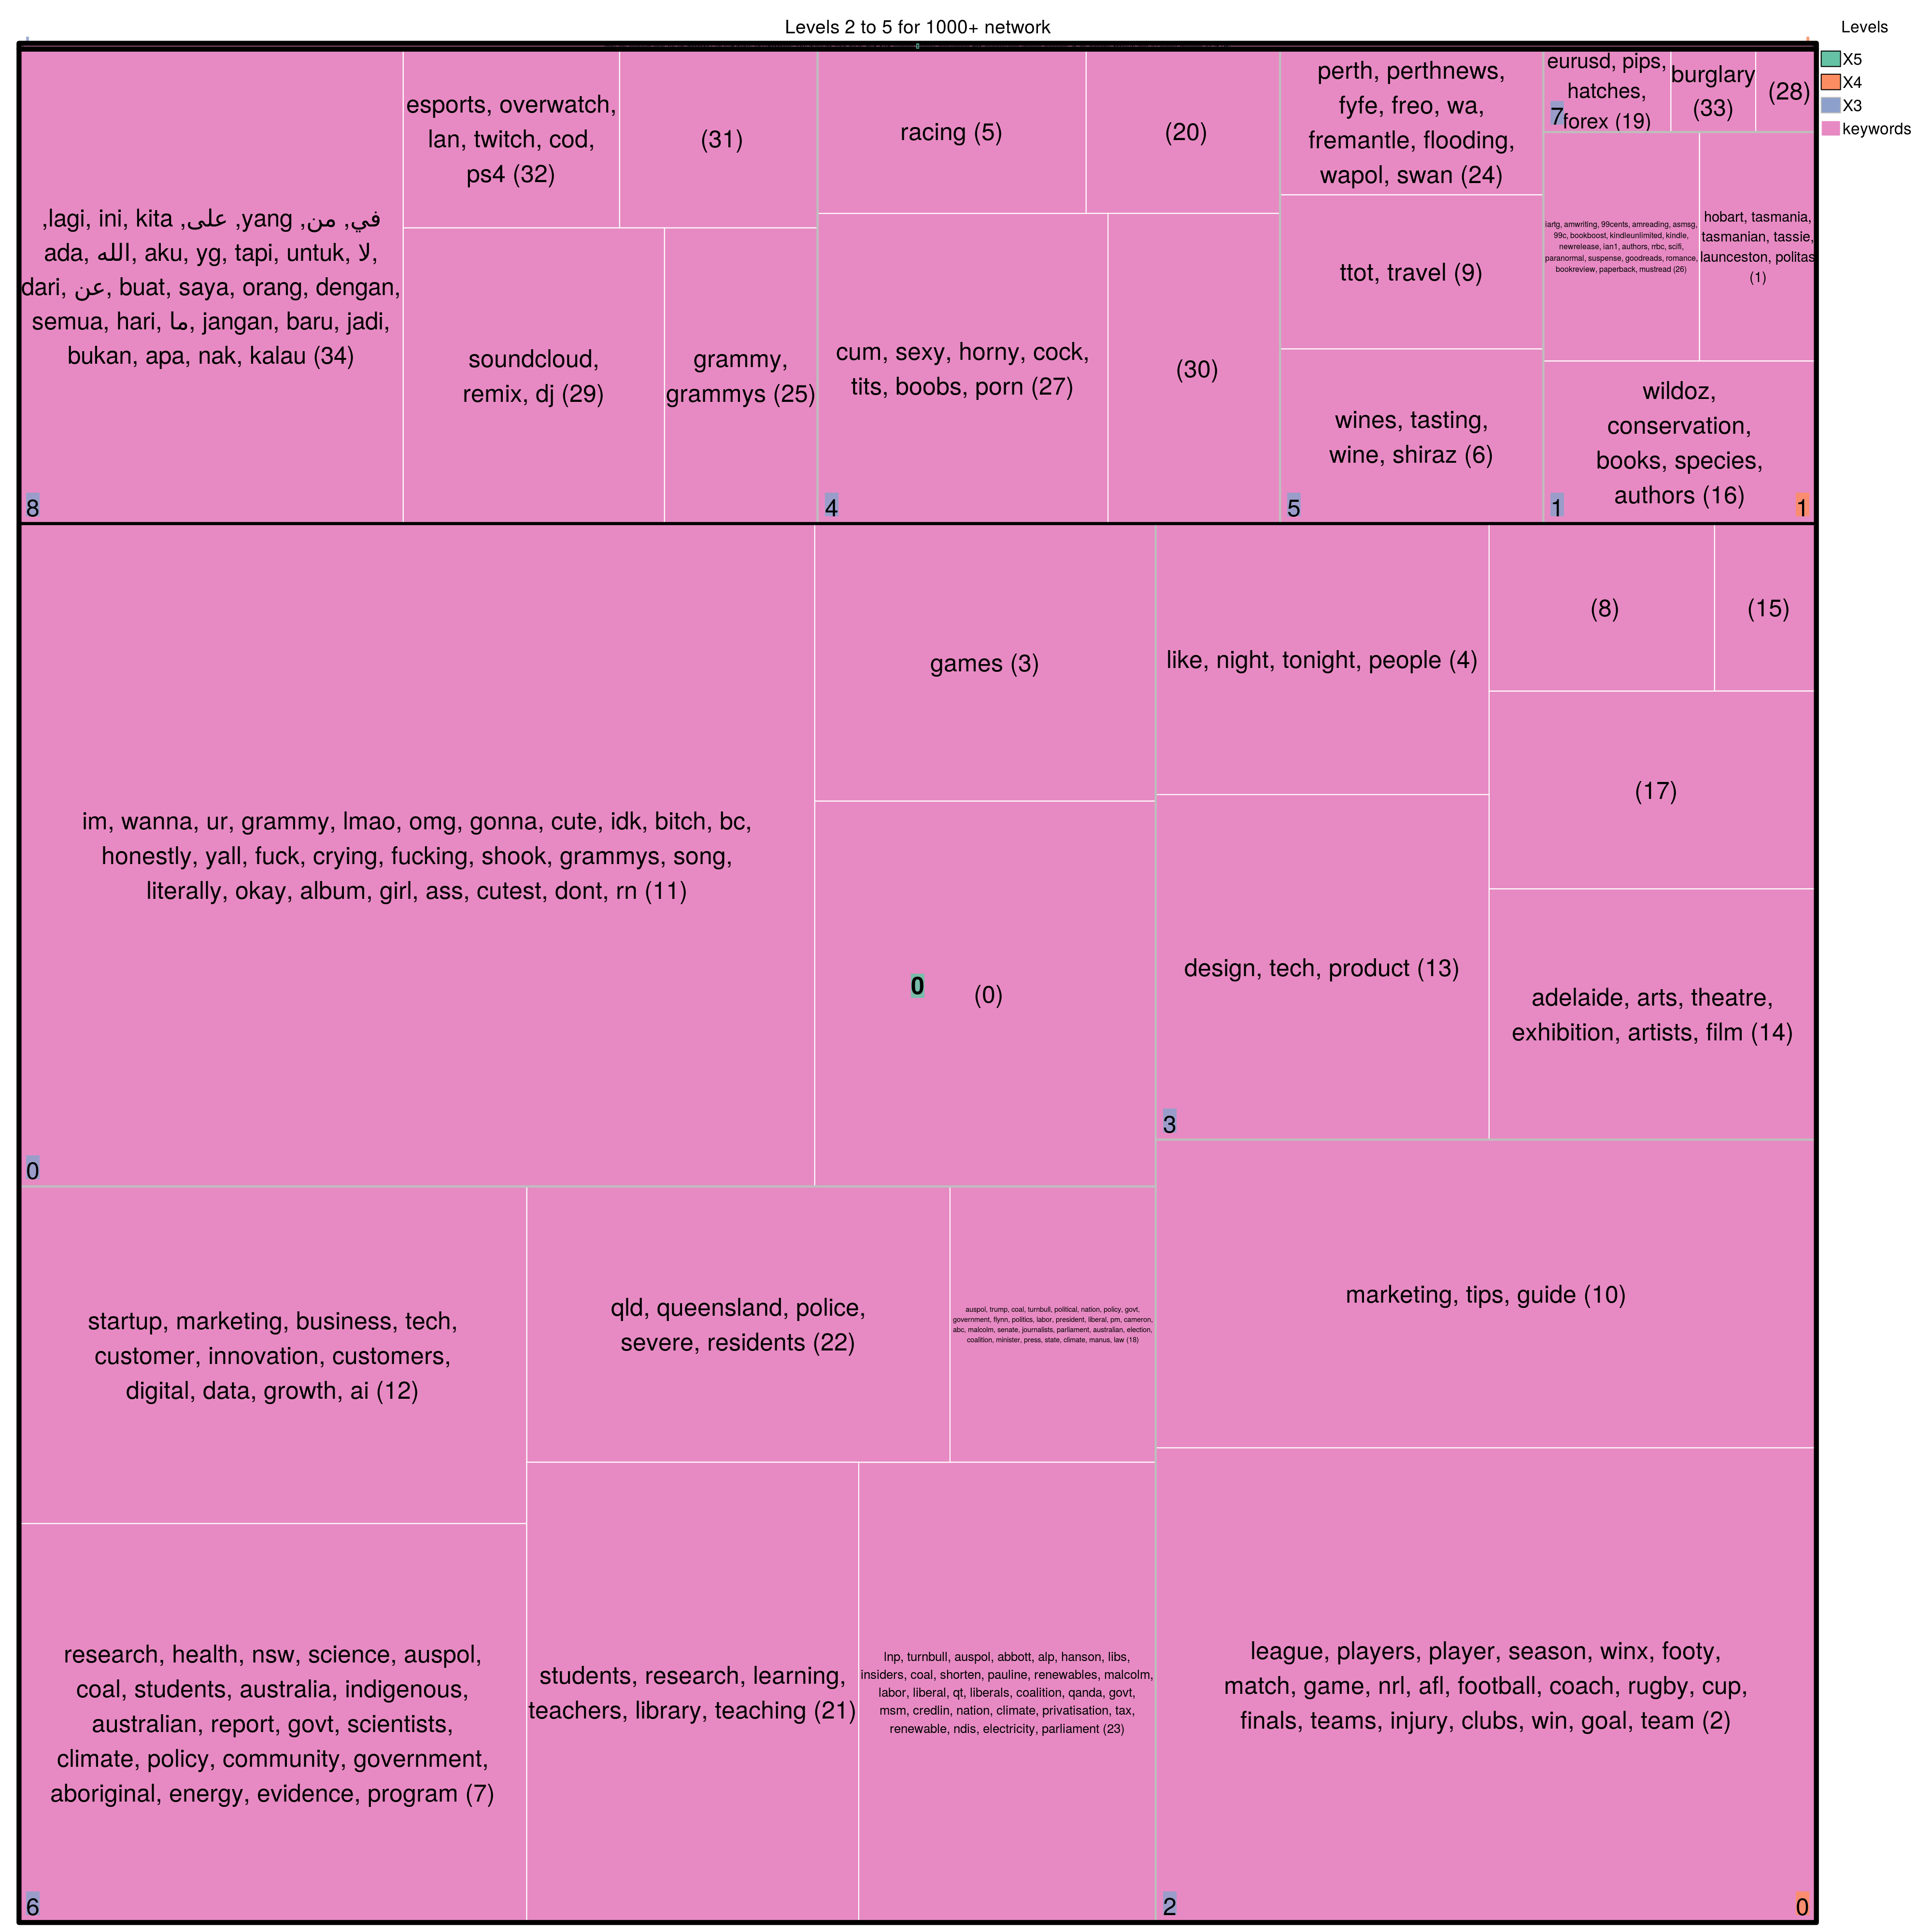

In [167]:
%%R -i tree_2 -w 4000 -h 4000 --units px -r 200

library(treemap)

p=treemap(tree_2,
            index=c("X5","X4","X3","keywords"),
            vSize="n",
            type="depth",
            title="Levels 2 to 5 for 1000+ network",
            title.legend="Levels",
            border.col=c("black","black","grey","white"),
            force.print.labels=TRUE,
            overlap.labels=1,
            lowerbound.cex.labels=0,
            algorithm="squarified",
             align.labels=list(
                c("center", "center"), 
                c("right", "bottom"),
                c("left", "bottom"),
                c("center", "center")
                ),
                     fontsize.labels=18
            )

In [145]:
tree_3 = get_tree_until_level(tree_data_n, keyword_tables, 2)

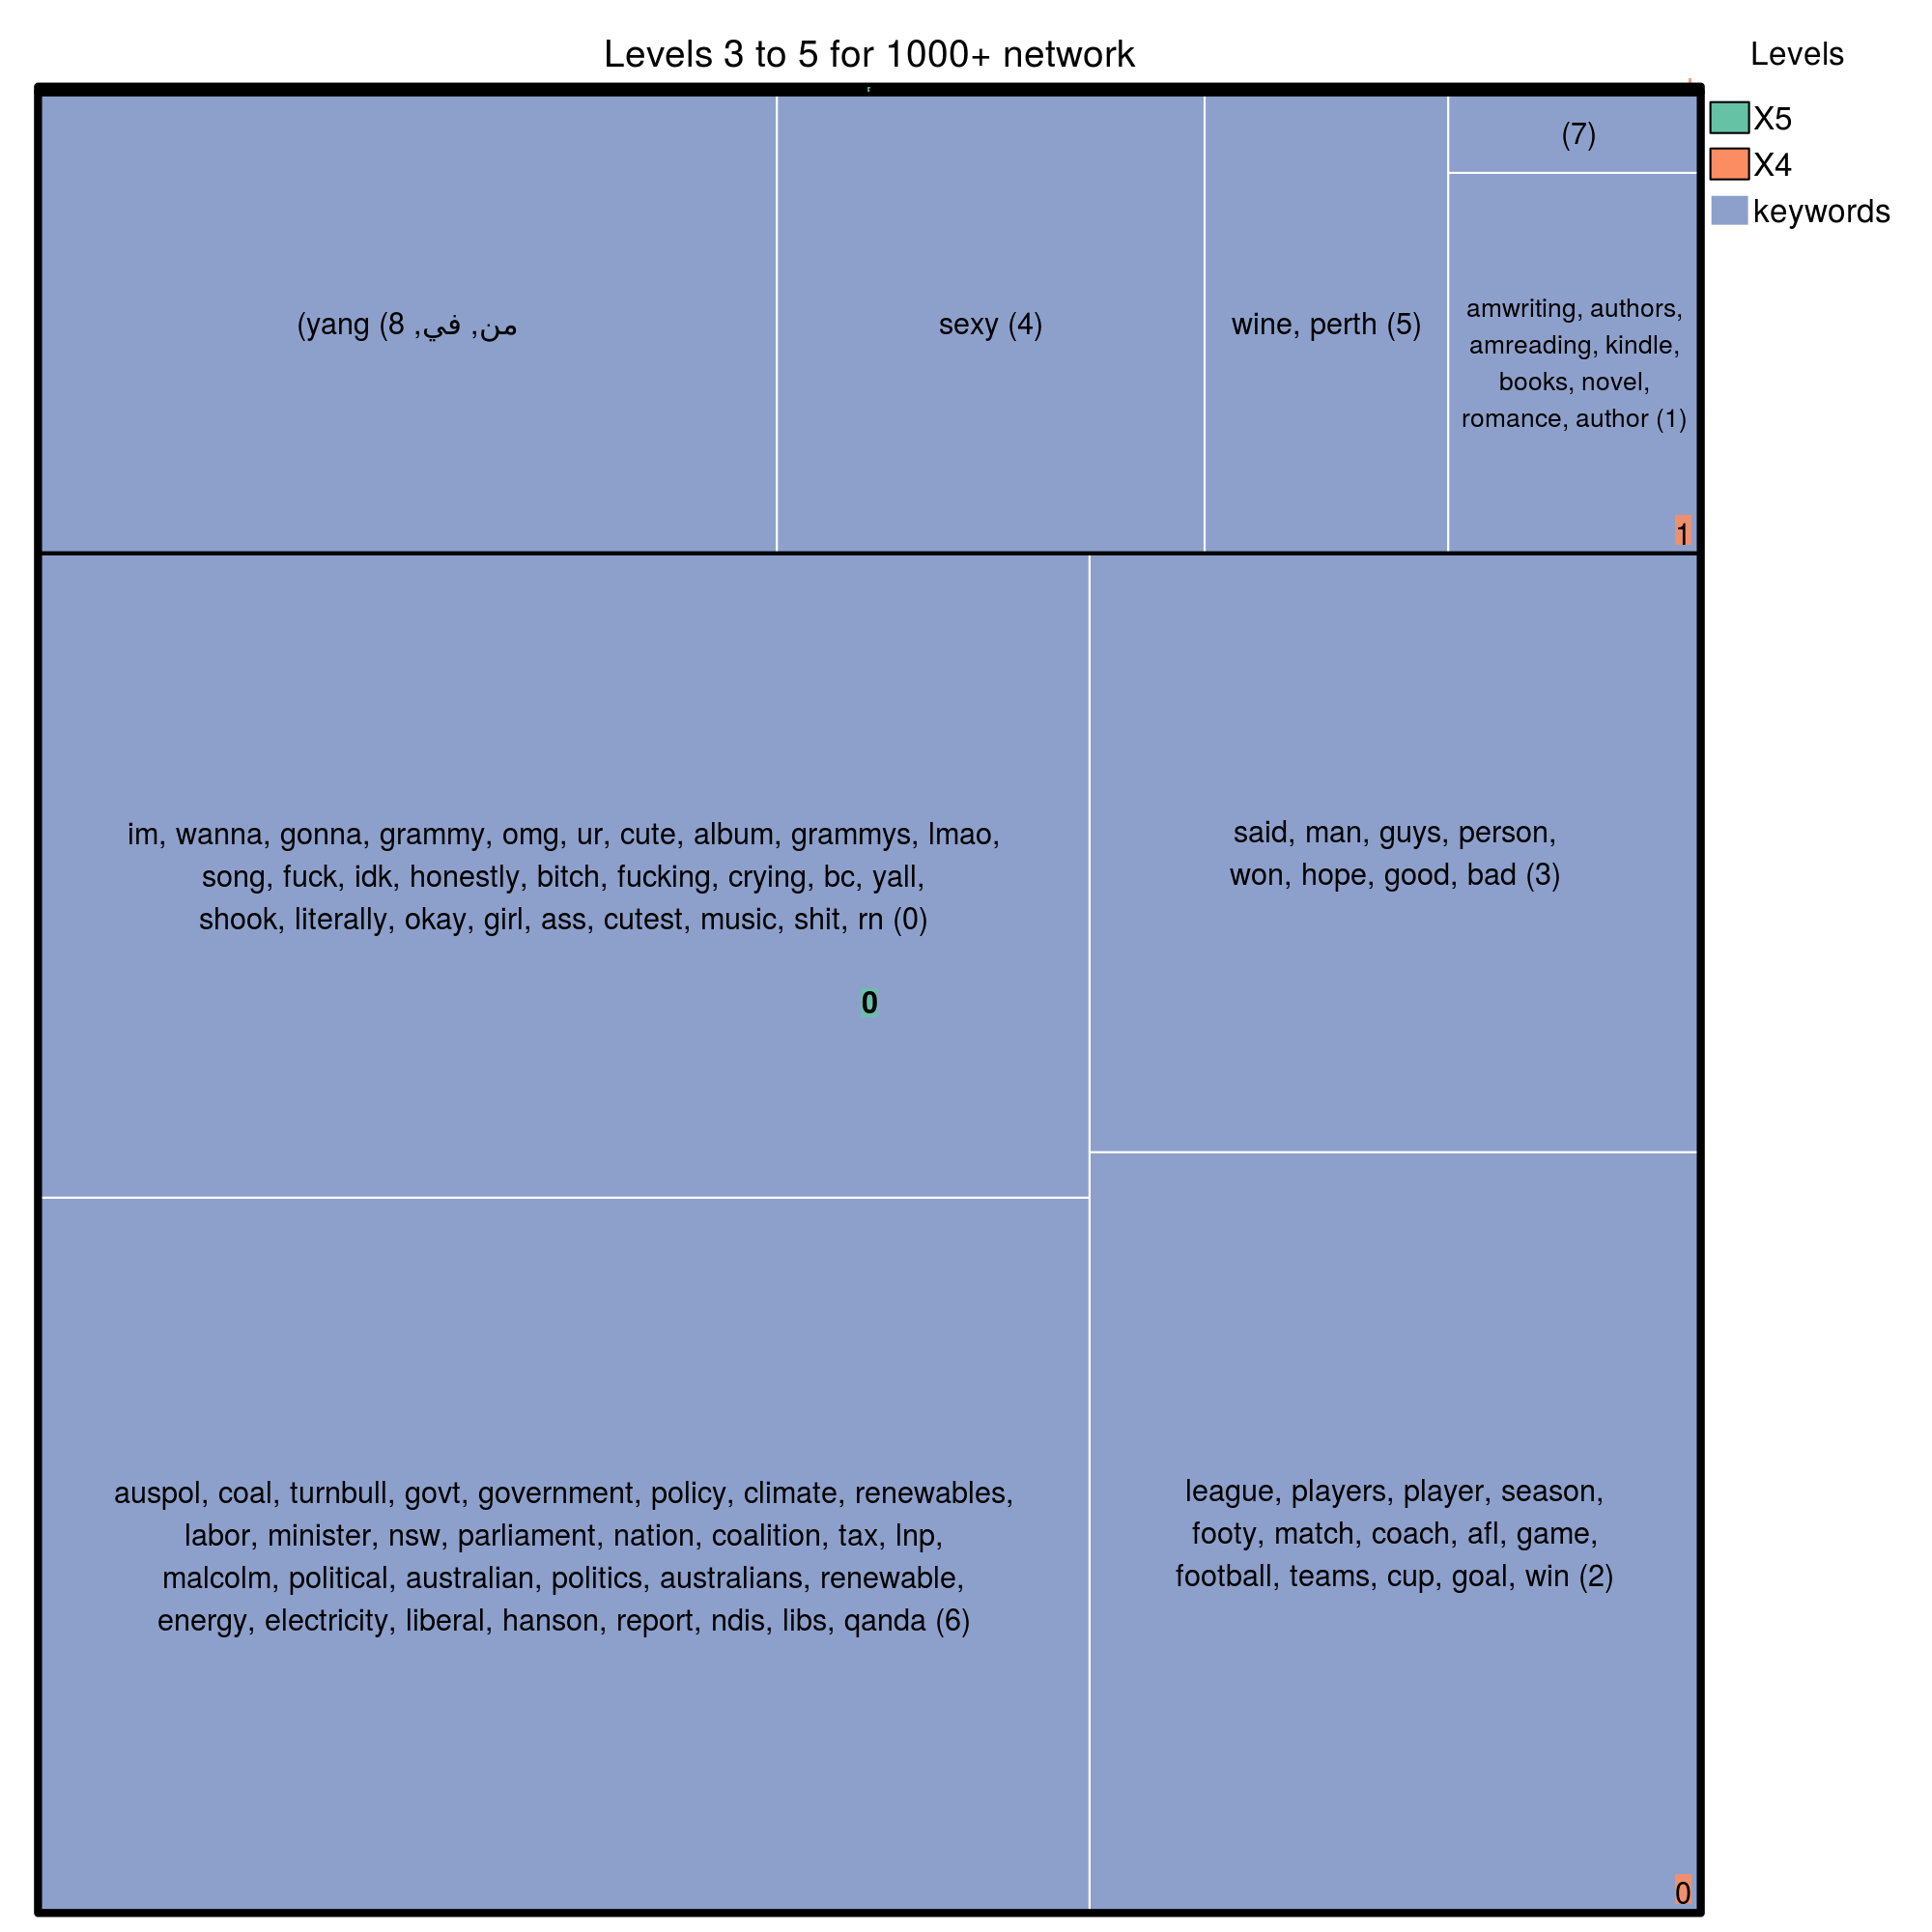

In [146]:
%%R -i tree_3 -w 2000 -h 2000 --units px -r 200

library(treemap)

p=treemap(tree_3,
            index=c("X5","X4","keywords"),
            vSize="n",
            type="depth",
            title="Levels 3 to 5 for 1000+ network",
            title.legend="Levels",
            border.col=c("black","black","white"),
            force.print.labels=TRUE,
            overlap.labels=1,
            lowerbound.cex.labels=0,
            algorithm="squarified",
             align.labels=list(
                c("center", "center"), 
                c("right", "bottom"),
                c("center", "center")
                ),
            )

In [147]:
tree_4 = get_tree_until_level(tree_data_n, keyword_tables, 3)

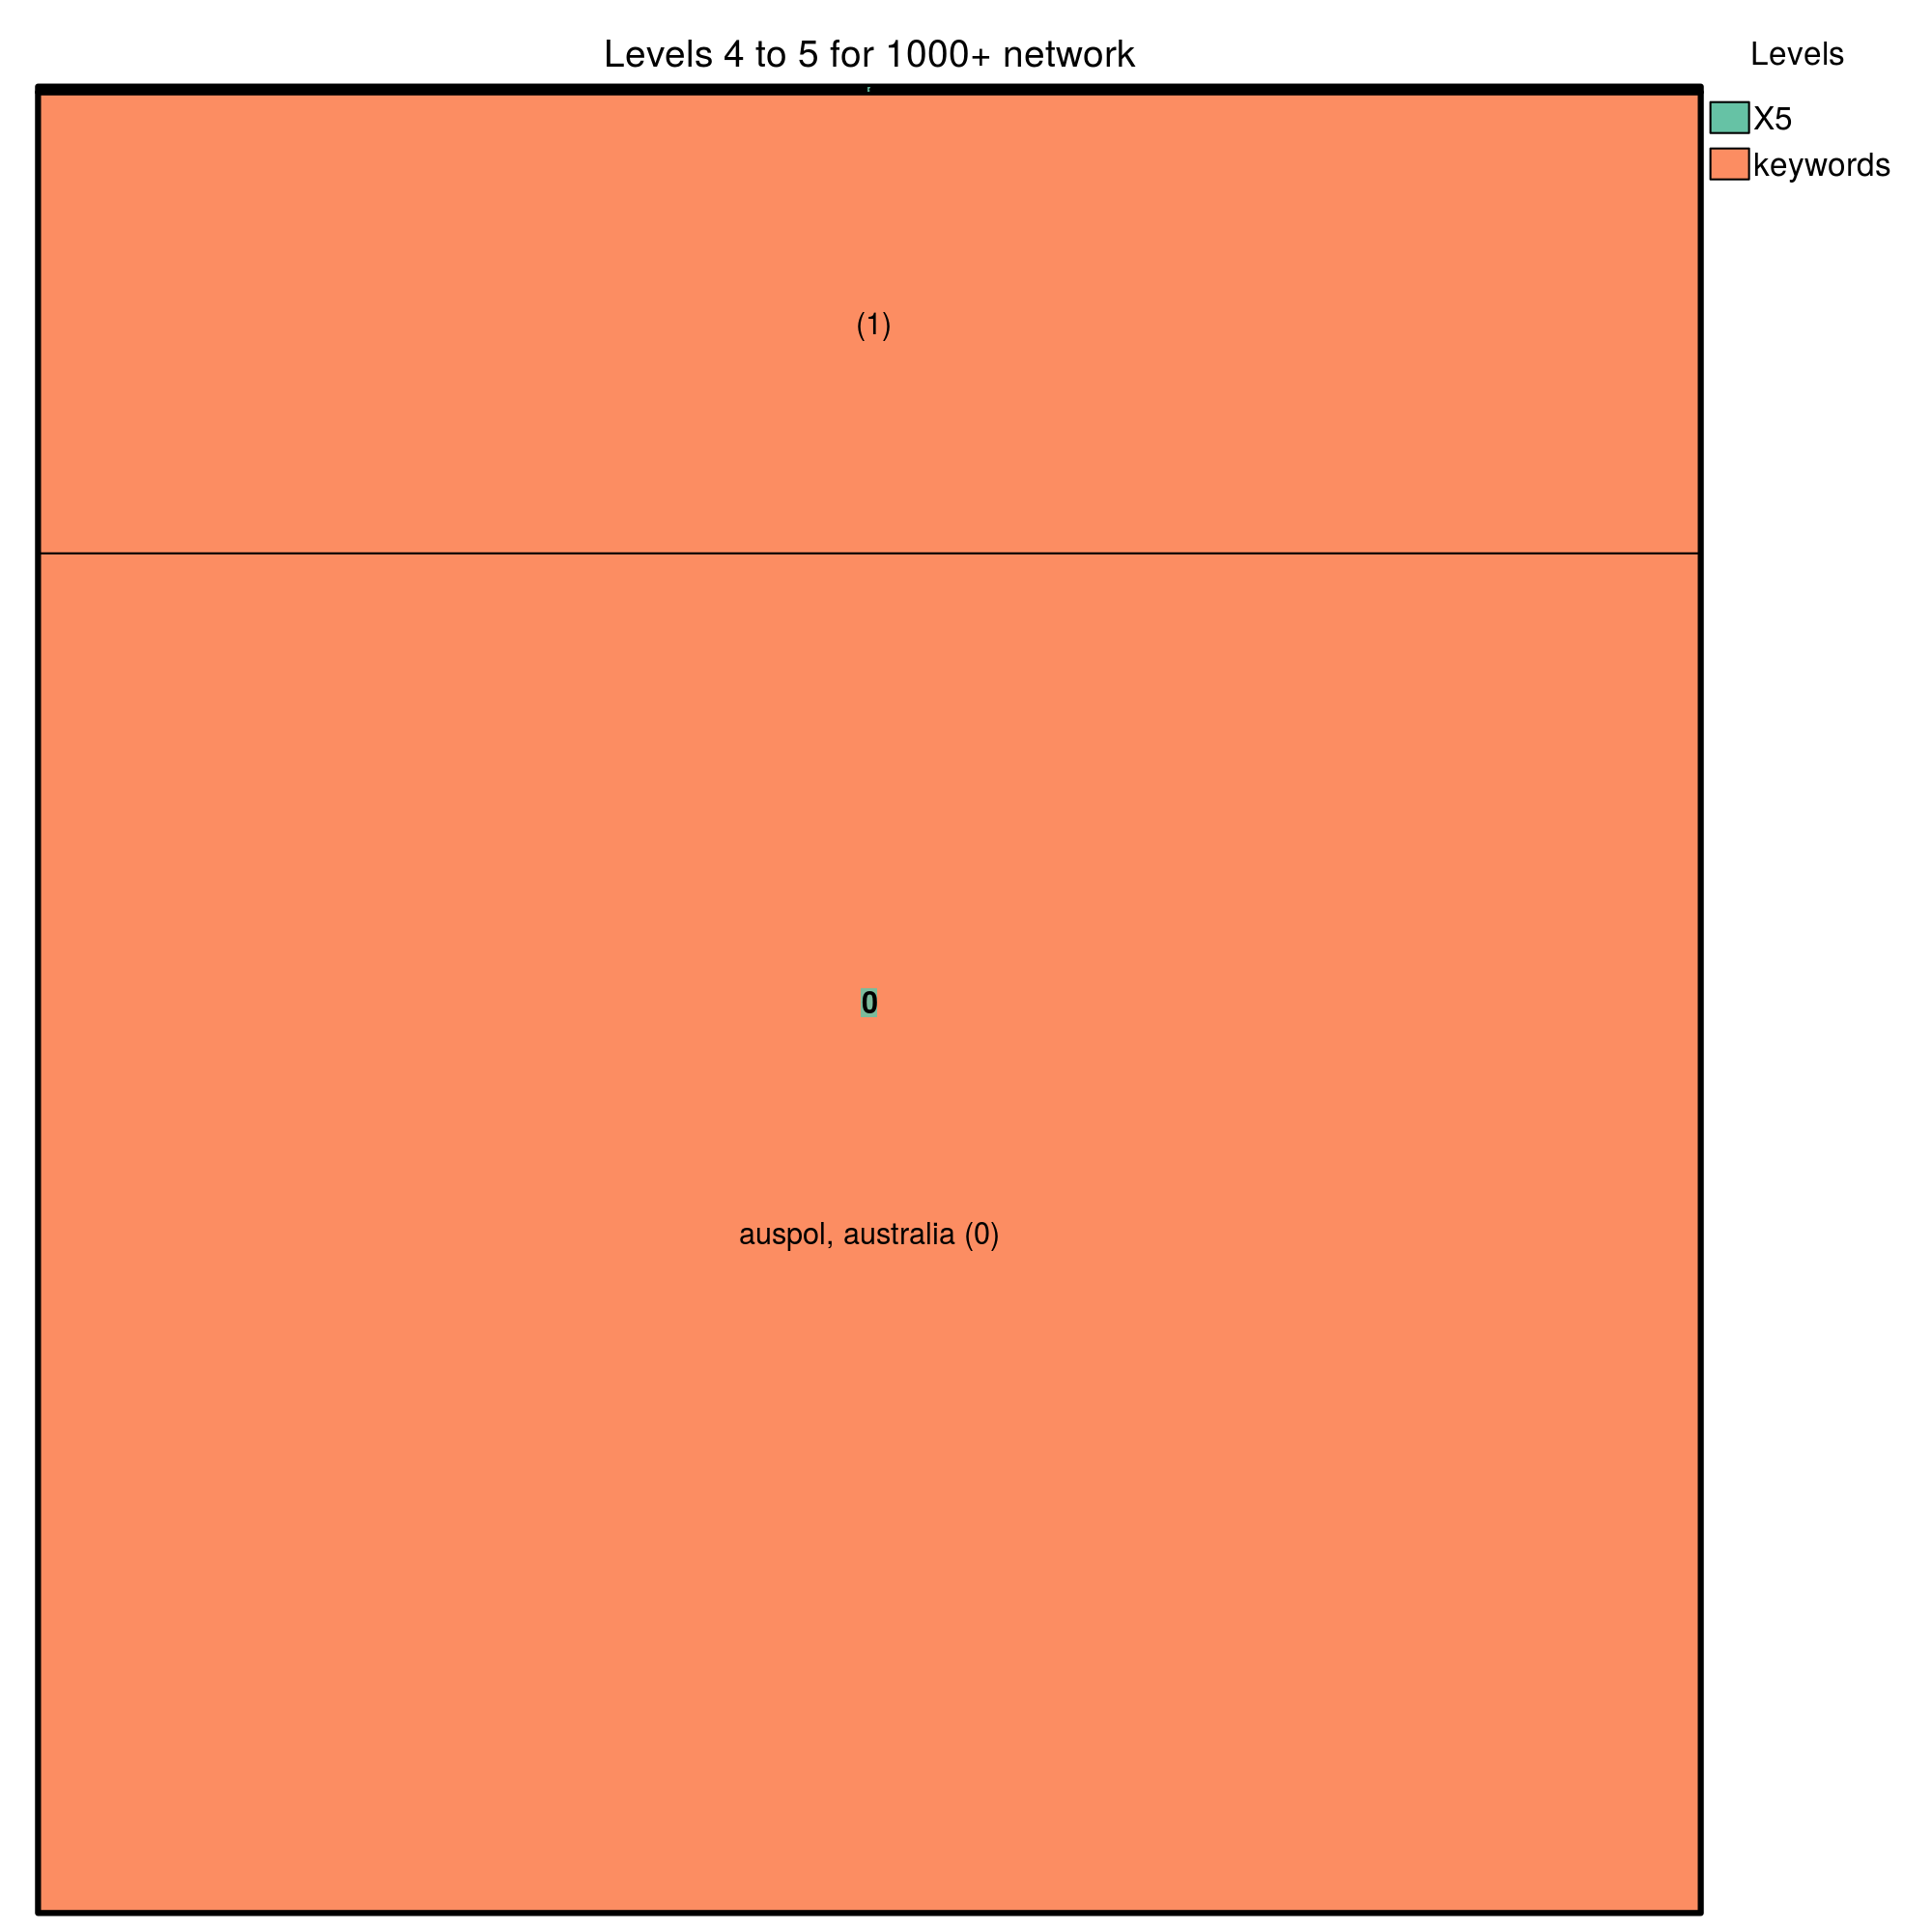

In [148]:
%%R -i tree_4 -w 2000 -h 2000 --units px -r 200

library(treemap)

p=treemap(tree_4,
            index=c("X5","keywords"),
            vSize="n",
            type="depth",
            title="Levels 4 to 5 for 1000+ network",
            title.legend="Levels",
            border.col=c("black","black"),
            force.print.labels=TRUE,
            overlap.labels=1,
            lowerbound.cex.labels=0,
            algorithm="squarified",
            align.labels=list(
                c("center", "center"), 
                c("center", "center")
                ),
            )